# Titanic Dataset: Data Understanding, Visualization, and Cleaning

## Project Context
This notebook is part of the Titanic++ Capstone Project.  
The goal of this notebook is to:
- Understand the structure of the Titanic dataset
- Identify missing values, duplicates, and extreme values
- Perform basic exploratory data analysis (EDA)
- Clean and prepare the data for machine learning

This step is critical before building any predictive models.


In [12]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
from pathlib import Path


BASE_PATH = Path.cwd().parent
DATA_PATH = BASE_PATH / "data"
PLOTS_PATH = BASE_PATH / "notebooks" / "plots"

train = pd.read_csv(DATA_PATH / "raw" / "train.csv")

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()
train.isnull().sum()


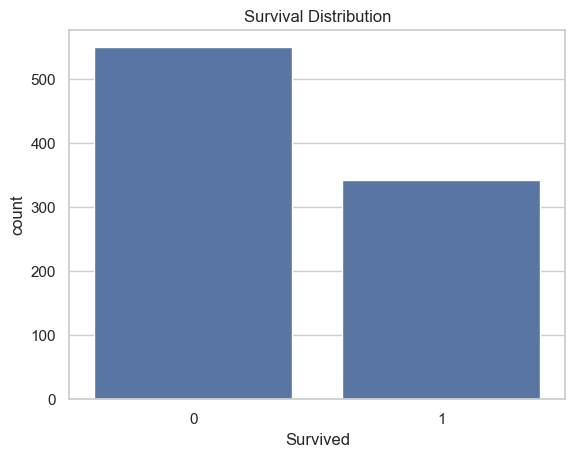

In [17]:
sns.countplot(x="Survived", data=train)
plt.title("Survival Distribution")
plt.show()


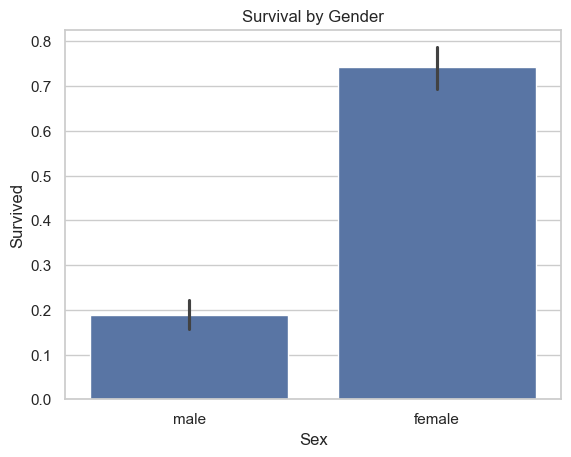

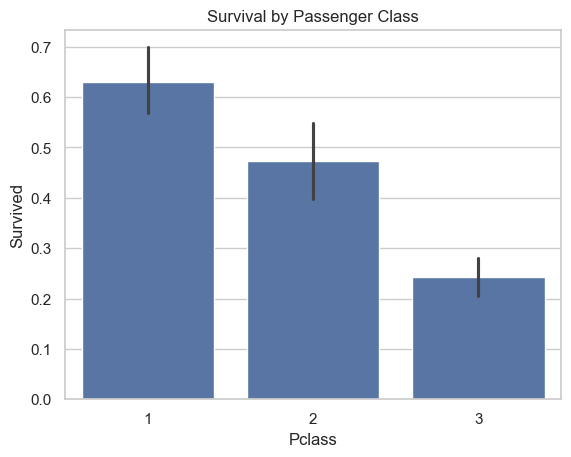

In [21]:
sns.barplot(x="Sex", y="Survived", data=train)
plt.title("Survival by Gender")
plt.show()

sns.barplot(x="Pclass", y="Survived", data=train)
plt.title("Survival by Passenger Class")
plt.show()


In [ ]:
train.drop(["Cabin", "Ticket", "Name"], axis=1, inplace=True)


In [ ]:

train["Age"].fillna(train["Age"].median(), inplace=True)

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)



In [33]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train["IsAlone"] = (train["FamilySize"] == 1).astype(int)


In [34]:
def age_group(age):
    if age < 16:
        return "Child"
    elif age < 50:
        return "Adult"
    else:
        return "Senior"

train["AgeGroup"] = train["Age"].apply(age_group)


In [35]:
categorical_cols = ["Sex", "Embarked", "AgeGroup"]

train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)

In [36]:
X = train.drop(["Survived", "PassengerId"], axis=1)
y = train["Survived"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_val)

print("Logistic Regression Accuracy:", accuracy_score(y_val, log_preds))
print(classification_report(y_val, log_preds))


In [38]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_val)

print("Random Forest Accuracy:", accuracy_score(y_val, rf_preds))
print(classification_report(y_val, rf_preds))


Random Forest Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



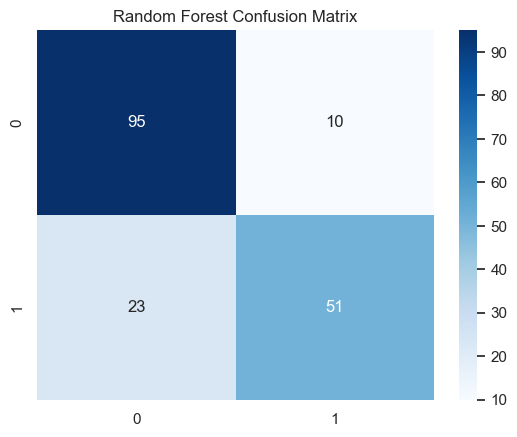

In [39]:
sns.heatmap(confusion_matrix(y_val, rf_preds), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [40]:
feature_importance = pd.Series(
    rf_model.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


Sex_male          0.414826
Fare              0.165062
Pclass            0.123438
Age               0.102603
FamilySize        0.063125
SibSp             0.034241
AgeGroup_Child    0.026619
Parch             0.020809
Embarked_S        0.020027
IsAlone           0.016366
dtype: float64

In [43]:
#test